In [10]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

ruta = r"../data/2023_gob.xls"
data = pd.read_excel(ruta, sheet_name=0)

# Establecer la primera fila como encabezados
data.columns = data.iloc[0]
data = data[1:]  # Eliminar la primera fila

# Restablecer los índices
data.reset_index(drop=True, inplace=True)

# Borrar las ultimas dos filas
data = data[:213]

# Nombres de las columnas con las que se trabajaran
col_names = ["cc", "ge", "pv", "rl", "rq", "va"]

In [15]:
data.head()

,Etiquetas de fila,cc,ge,pv,rl,rq,va
0,Afghanistan,-1.154932,-1.987014,-2.484081,-1.649641,-1.266425,-1.852901
1,Albania,-0.332219,0.250855,0.183349,-0.164097,0.171954,0.168997
2,Algeria,-0.589308,-0.670135,-0.577885,-0.678364,-0.948087,-0.979884
3,American Samoa,1.251356,0.654168,1.114221,1.212491,0.512014,0.94885
4,Andorra,1.251356,1.475439,1.583466,1.476899,1.350546,0.99694


# K-means clusters

/home/damian/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


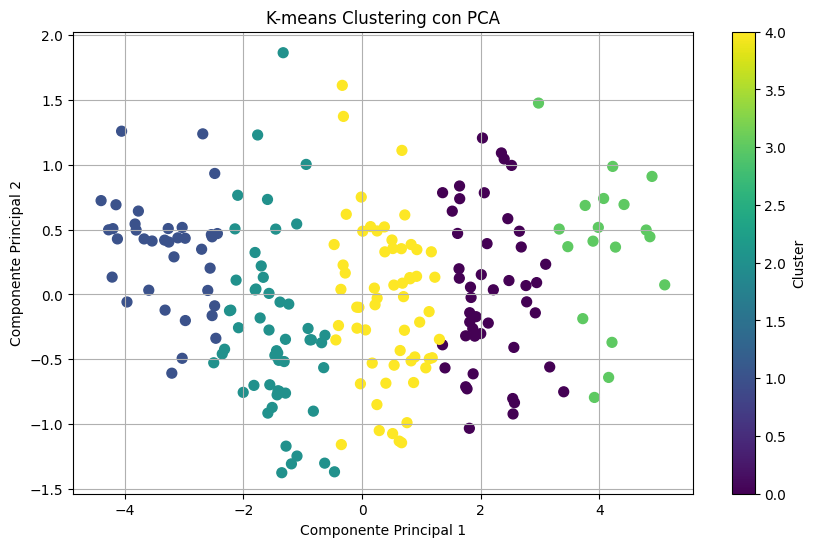

In [17]:
# Seleccionar solo las columnas relevantes
X = data[col_names].astype(float)  # Asegurarse de que los datos sean numéricos

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar k-means clustering con k=5
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Agregar etiquetas de clúster al DataFrame original
data['cluster'] = kmeans.labels_

# Aplicar PCA para reducir a 2 dimensiones para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear un DataFrame para la visualización con PCA
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = kmeans.labels_

# Graficar los resultados del clustering
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], cmap='viridis', s=50)
plt.title('K-means Clustering con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

In [20]:
pca_df.head(10)

,PC1,PC2,cluster
0,4.225861,0.987152,3
1,-0.088740,-0.098077,4
2,1.828178,0.056375,0
3,-2.316977,-0.422327,2
4,-3.320056,-0.120903,1
5,1.899949,-0.321470,0
6,-2.526985,-0.163069,1
7,-1.312690,-0.517336,2
8,0.541093,-0.545247,4
9,0.377125,0.520612,4


In [29]:
data.head(10)

,Etiquetas de fila,cc,ge,pv,rl,rq,va,cluster
0,Afghanistan,-1.154932,-1.987014,-2.484081,-1.649641,-1.266425,-1.852901,3
1,Albania,-0.332219,0.250855,0.183349,-0.164097,0.171954,0.168997,4
2,Algeria,-0.589308,-0.670135,-0.577885,-0.678364,-0.948087,-0.979884,0
3,American Samoa,1.251356,0.654168,1.114221,1.212491,0.512014,0.94885,2
4,Andorra,1.251356,1.475439,1.583466,1.476899,1.350546,0.99694,1
5,Angola,-0.60992,-1.00891,-0.341505,-1.099066,-0.761388,-0.737252,0
6,Anguilla,1.251356,1.201682,1.114221,0.683676,0.93128,1.036443,1
7,Antigua and Barbuda,0.326793,0.380411,0.923393,0.378593,0.546037,0.74184,2
8,Argentina,-0.360884,-0.377517,-0.127518,-0.410827,-0.482535,0.533922,4
9,Armenia,0.0584,-0.18413,-0.829278,-0.122018,0.047635,0.076708,4


In [41]:
# Agrupar el DataFrame por la columna 'cluster'
grouped_data = data[["cc","cluster"]].groupby('cluster')

#'''
# Para obtener estadísticas descriptivas de cada grupo
summary = grouped_data.describe()

# Para calcular la media de cada columna para cada grupo
mean_values = grouped_data.mean()

# Mostrar los resultados
print(summary)
print(mean_values)
#'''

0          cc                      
        count unique       top freq
cluster                            
0        46.0   46.0 -0.589308  1.0
1        36.0   31.0  1.251356  5.0
2        54.0   50.0  1.251356  2.0
3        18.0   18.0 -1.154932  1.0
4        59.0   59.0 -0.332219  1.0
0              cc
cluster          
0       -0.932598
1        1.497885
2        0.604456
3       -1.465709
4       -0.292918
